In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dropout,Dense,BatchNormalization

In [2]:
model=keras.models.load_model('models/ref/ref_cnn1.h5')

In [3]:
import os

x_test=[]

path_test_low='../dataSets/test images/'

print('\nLoding Test dataset :')

i=0;
for img in os.listdir(path_test_low):
    img_low_path=os.path.join(path_test_low, img)
    
    img_low=load_img(img_low_path, target_size=(128, 128))
    img_low=img_to_array(img_low)/255.
    
    i=i+1
    print("{:.2f}".format(i/0.1)+' %',end='\r')
    
    x_test.append(img_low)

x_test=np.array(x_test, dtype="float32")


Loding Test dataset :


In [6]:
def reformUtil(a,c):
    b=np.zeros(a.shape);
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            b[i][j]=(1+a[i][j])-2*c[i][j];
    return(b);
def reform(a,c):
    Rl,Gl,Bl=cv2.split(a);
    Rd,Gd,Bd=cv2.split(c);
    
    Rf=reformUtil(Rl,Rd);
    Gf=reformUtil(Gl,Gd);
    Bf=reformUtil(Bl,Bd);
    
    img_reform=cv2.merge((Rf,Gf,Bf));
    return img_reform;

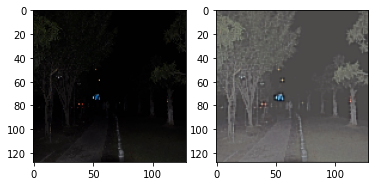

In [25]:
fig=plt.figure()

def check_result(n):
    fig.add_subplot(1,2,1).imshow(x_test[n])
    M=reform(x_test[n],model.predict(x_test)[n]).max();
    m=reform(x_test[n],model.predict(x_test)[n]).min();
    fig.add_subplot(1,2,2).imshow((reform(x_test[n],model.predict(x_test)[n])-m)/(M-m));

check_result(3)

In [22]:
M=reform(x_test[1],model.predict(x_test)[1]).max();
m=reform(x_test[1],model.predict(x_test)[1]).min();
((reform(x_test[1],model.predict(x_test)[1])-m)/(M-m)).max()

1.0